#### HMA glacier elevatin change analysis by using data by Huggonet et al.(2021) .

In [1]:
import geopandas as gpd
import cartopy.crs as ccrs 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
path_hma_gtng = 'data/extents/HMA/gtng_202307_hma_subregions.gpkg'
path_dhdt_2000_2019 = 'data/glaciers/gla-elev-change-hugonnet/time_series_with_fixed_glacier_areas/dh_rgi60_O2_rates.csv'


In [18]:
### read in data   
hma_gtng = gpd.read_file(path_hma_gtng).to_crs(ccrs.PlateCarree().proj4_init)
dhdt = pd.read_csv(path_dhdt_2000_2019)
hma_gtng.head()
# dhdt.head()

,o1region,o2region,full_name,long_code,geometry
0,13,13-01,Hissar Alay,13-01_hissar_alay,"MULTIPOLYGON (((70.000 40.700, 71.000 40.700, ..."
1,13,13-02,Pamir (Safed Khirs / West Tarim),13-02_pamir_safed_khirs_west_tarim,"MULTIPOLYGON (((74.355 39.804, 74.376 39.808, ..."
2,13,13-03,West Tien Shan,13-03_west_tien_shan,"MULTIPOLYGON (((77.999 43.697, 78.500 43.750, ..."
3,13,13-04,East Tien Shan (Dzhungaria),13-04_east_tien_shan_dzhungaria,"MULTIPOLYGON (((78.500 43.750, 78.500 44.000, ..."
4,13,13-05,West Kun Lun,13-05_west_kun_lun,"MULTIPOLYGON (((76.495 37.982, 76.509 37.967, ..."


In [11]:
### select period of 2000-2019
dhdt_2000_2019 = dhdt[(dhdt['period']=='2000-01-01_2020-01-01') & (dhdt['subreg'].str.contains('13-|14-|15-'))]
print(dhdt_2000_2019.shape)
dhdt_2000_2019.head(15)
### select the non-duplicate data
dhdt_2000_2019_filter = dhdt_2000_2019.dropna().drop_duplicates()
print(dhdt_2000_2019_filter.shape)
dhdt_2000_2019_filter.head(5)


(180, 9)
(15, 9)


,subreg,period,area,dhdt,err_dhdt,dvoldt,err_dvoldt,dmdt,err_dmdt
21089,13-Jan,2000-01-01_2020-01-01,1848937000,-0.122,0.038,-224860271,69770871,-0.1911,0.0608
21341,13-Feb,2000-01-01_2020-01-01,10236502000,-0.105,0.028,-1071495985,288134919,-0.9108,0.2532
21593,13-Mar,2000-01-01_2020-01-01,9534330000,-0.290,0.038,-2768958254,361244143,-2.3536,0.3491
21845,13-Apr,2000-01-01_2020-01-01,2856950000,-0.564,0.058,-1611969119,164065638,-1.3702,0.1697
22097,13-May,2000-01-01_2020-01-01,8141061000,0.112,0.029,911746494,239893248,0.7750,0.2111


In [12]:
dhdt_2000_2019_filter['subreg'] = dhdt_2000_2019_filter['subreg'].replace({
                                  'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04',
                                  'May': '05', 'Jun': '06', 'Jul': '07', 'Aug': '08',
                                  'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'
                                  }, regex=True)
dhdt_2000_2019_filter.head()


,subreg,period,area,dhdt,err_dhdt,dvoldt,err_dvoldt,dmdt,err_dmdt
21089,13-01,2000-01-01_2020-01-01,1848937000,-0.122,0.038,-224860271,69770871,-0.1911,0.0608
21341,13-02,2000-01-01_2020-01-01,10236502000,-0.105,0.028,-1071495985,288134919,-0.9108,0.2532
21593,13-03,2000-01-01_2020-01-01,9534330000,-0.290,0.038,-2768958254,361244143,-2.3536,0.3491
21845,13-04,2000-01-01_2020-01-01,2856950000,-0.564,0.058,-1611969119,164065638,-1.3702,0.1697
22097,13-05,2000-01-01_2020-01-01,8141061000,0.112,0.029,911746494,239893248,0.7750,0.2111


In [13]:
## add the geometry of hma subregion to the dhdt_2000_2019_filter
dhdt_2000_2019_filter = dhdt_2000_2019_filter.merge(hma_gtng[['o2region','full_name', 'geometry']], \
                                                    left_on='subreg', right_on='o2region', how='left')
dhdt_2000_2019_filter = dhdt_2000_2019_filter.drop(columns=['o2region']) 
dhdt_2000_2019_filter = gpd.GeoDataFrame(dhdt_2000_2019_filter, geometry='geometry') ## convert to geodataframe
dhdt_2000_2019_filter.head()


,subreg,period,area,dhdt,err_dhdt,dvoldt,err_dvoldt,dmdt,err_dmdt,full_name,geometry
0,13-01,2000-01-01_2020-01-01,1848937000,-0.122,0.038,-224860271,69770871,-0.1911,0.0608,Hissar Alay,"MULTIPOLYGON (((70.000 40.700, 71.000 40.700, ..."
1,13-02,2000-01-01_2020-01-01,10236502000,-0.105,0.028,-1071495985,288134919,-0.9108,0.2532,Pamir (Safed Khirs / West Tarim),"MULTIPOLYGON (((74.355 39.804, 74.376 39.808, ..."
2,13-03,2000-01-01_2020-01-01,9534330000,-0.290,0.038,-2768958254,361244143,-2.3536,0.3491,West Tien Shan,"MULTIPOLYGON (((77.999 43.697, 78.500 43.750, ..."
3,13-04,2000-01-01_2020-01-01,2856950000,-0.564,0.058,-1611969119,164065638,-1.3702,0.1697,East Tien Shan (Dzhungaria),"MULTIPOLYGON (((78.500 43.750, 78.500 44.000, ..."
4,13-05,2000-01-01_2020-01-01,8141061000,0.112,0.029,911746494,239893248,0.7750,0.2111,West Kun Lun,"MULTIPOLYGON (((76.495 37.982, 76.509 37.967, ..."


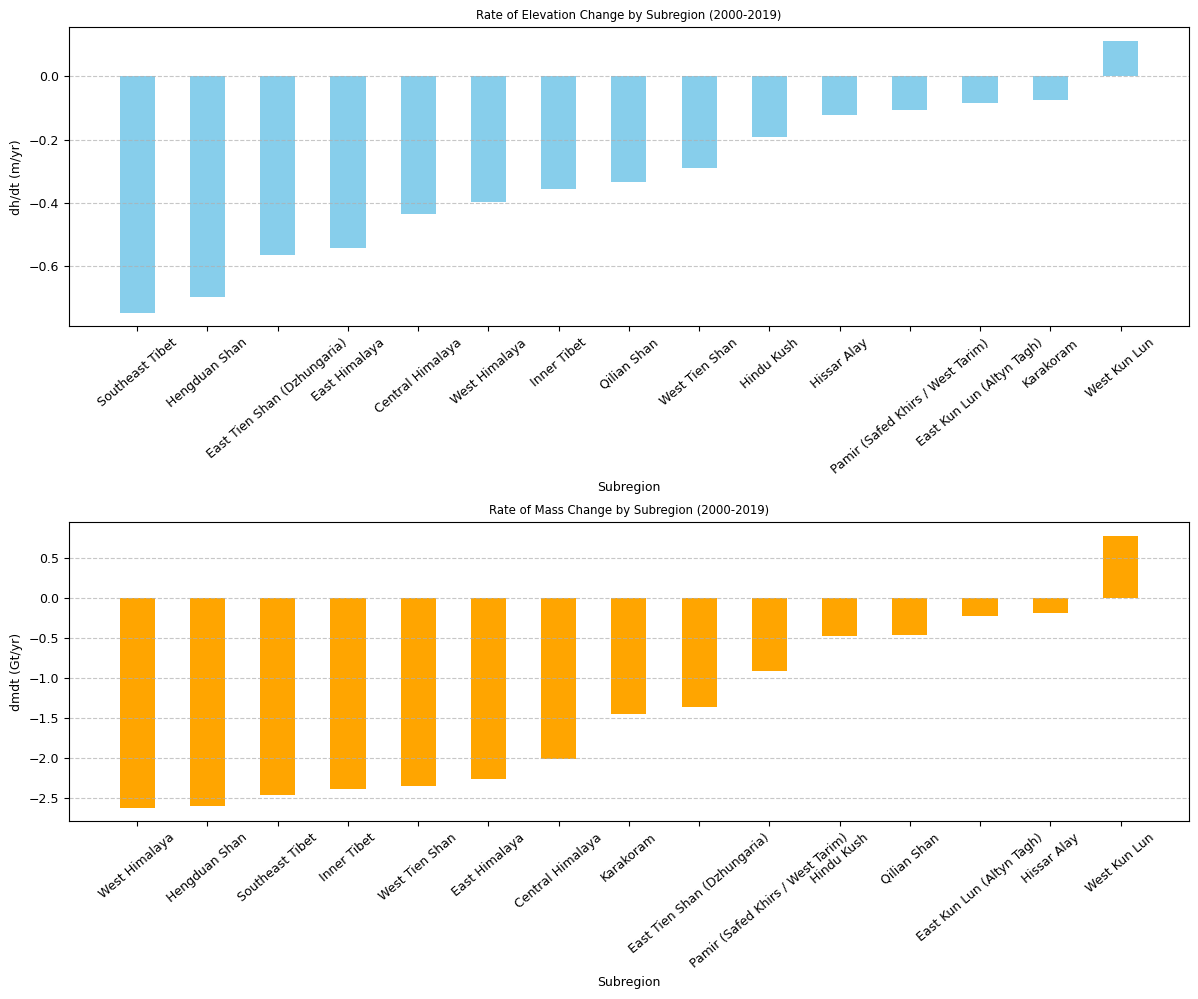

In [14]:
subreg = dhdt_2000_2019_filter['full_name']
dhdt, dmdt = dhdt_2000_2019_filter['dhdt'], dhdt_2000_2019_filter['dmdt']
df_combined = pd.DataFrame({'subreg': subreg, 'dhdt': dhdt, 'dmdt': dmdt})
fig, axs = plt.subplots(2, 1, figsize=(12, 10))
plt.rcParams.update({'font.size':7})
# Plotting the sorted bar chart for dhdt
df_sorted_dhdt = df_combined.sort_values(by='dhdt')
axs[0].bar(df_sorted_dhdt['subreg'], df_sorted_dhdt['dhdt'], color='skyblue', width=0.5)
axs[0].set_xlabel('Subregion')
axs[0].set_ylabel('dh/dt (m/yr)')
axs[0].set_title('Rate of Elevation Change by Subregion (2000-2019)')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)
axs[0].tick_params(axis='x', rotation=40)

# Plotting the sorted bar chart for dmdt
df_sorted_dmdt = df_combined.sort_values(by='dmdt')
axs[1].bar(df_sorted_dmdt['subreg'], df_sorted_dmdt['dmdt'], color='orange', width=0.5)
axs[1].set_xlabel('Subregion')
axs[1].set_ylabel('dmdt (Gt/yr)')
axs[1].set_title('Rate of Mass Change by Subregion (2000-2019)')
axs[1].grid(axis='y', linestyle='--', alpha=0.7)
axs[1].tick_params(axis='x', rotation=40)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

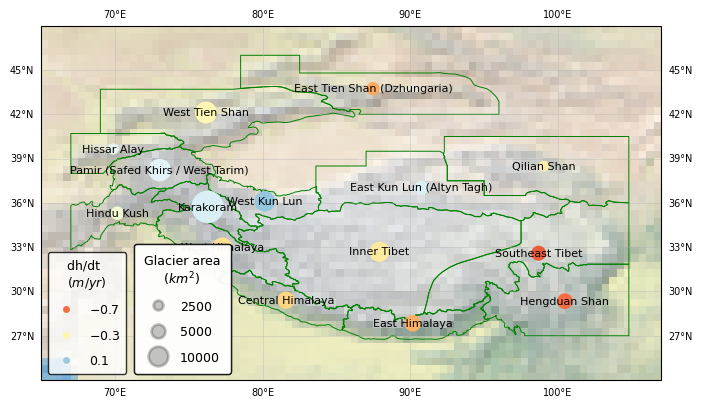

In [15]:
scale_size = 50
geo_centers = hma_gtng.geometry.centroid
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.set_extent([65.0, 107.0, 24.0, 46.0])
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)
ax.stock_img()
hma_gtng.plot(ax = ax, facecolor='None', edgecolor='green', lw=0.7)
for x, y, label in zip(geo_centers.x, geo_centers.y, hma_gtng['full_name']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center', transform=ccrs.PlateCarree())
scatter = ax.scatter(
        x = geo_centers.x,
        y = geo_centers.y,
        s = dhdt_2000_2019_filter['area'].values/(1000000*scale_size),
        c = dhdt_2000_2019_filter['dhdt'].values,
        cmap="RdYlBu",
        alpha=1, 
        linewidth=2,
        vmin=-1,
        vmax=0.5,
        transform=ccrs.PlateCarree(),
        )

# Produce a legend with the unique colors from the scatter
plt.rcParams.update({'font.size':9})
handles_1, labels_1 = scatter.legend_elements(prop="colors", num=[-0.7, -0.3, 0.1])
legend_color = ax.legend(handles_1, labels_1, loc="lower left", title="dh/dt \n($m/yr$)",
                        facecolor='white', edgecolor='black', borderpad=0.5, 
                        labelspacing=1, markerscale=0.5, 
                        fontsize=9)
num_scaled = [50, 100, 200]
handles_2, labels_2 = scatter.legend_elements(prop="sizes", num=num_scaled, alpha=0.2)
legend_glacier_area = ax.legend(handles_2, [num_scaled[0]*scale_size, num_scaled[1]*scale_size, num_scaled[2]*scale_size], 
                                loc="lower left", 
                                title="Glacier area\n     (${km^2}$)", 
                                edgecolor='black', 
                                borderpad=0.8, 
                                labelspacing=1, 
                                bbox_to_anchor=(0.14, 0.), markerscale=1, 
                                fontsize=9)
ax.add_artist(legend_color)
ax.add_artist(legend_glacier_area)
